In [24]:
import matplotlib.pyplot as plt
import numpy as np
from main import Model

In [25]:
def test_scatter(self, test_break):
    X = self.input[test_break[0]:test_break[1]]
    Y = [(activation(self.S, X[i:i+1], self.model, 1)[-1][0])
      for i in range(len(X))]

    Z = self.target[test_break[0]:test_break[1]]

    Y = pd.DataFrame(Y)
    Z = pd.DataFrame(Z)

    plot_target(Y, Z)

    return np.mean(np.sum(np.square(Z-Y), axis=0))

In [26]:
from dataset import normalize

def targetNormalize(target_data):
  data = target_data.copy()
  normalize(data)
  return data.to_numpy()

model = Model('./dataset/tp1_ej2_training.csv', (0, 8), (8, 10), targetNormalize)

In [29]:
def exp(S, max_epoch, lr, train_break, test_break, B):
    errors = model.train(S, max_epoch, lr, train_break, B)
    ecm, Y, Z = model.test(test_break)

    Z = Z[:20]
    Y = Y[:20]

    x = range(len(Z[0]))
    y = [(Z[0][i], Y[0][i]) for i in range(len(Z[0]))]#(1, 5), (1, 3), (2, 4), (2, 7)]


    plt.plot(x, [i for (i,j) in y], 'rs', markersize = 4)
    plt.plot(x, [j for (i,j) in y], 'bo', markersize = 4)
    plt.plot((x,x), ([i for (i,j) in y], [j for (i,j) in y]), c='black')

    for i in range(len(x)):
      plt.text(x[i]+2.2, y[i][0] + (y[i][1] - y[i][0])/2, '%.3f'%(y[i][1] - y[i][0]), horizontalalignment='right')

    plt.xlabel('instancias')
    plt.ylabel('valor energético de calefacción')
    plt.show()
    
    print(ecm)

S: [8, 8, 2]
Máxima #epocas: 2000
LR: 0.02
B (mini-lotes): 5
epoch: 100; error: 4.079197252079179
epoch: 200; error: 2.135689175986764
epoch: 300; error: 1.2012983455682162
epoch: 400; error: 1.0192668559967886
epoch: 500; error: 0.9085333392440245
epoch: 600; error: 0.8628383427094274
epoch: 700; error: 0.7862907370100951
epoch: 800; error: 0.7464438850156992
epoch: 900; error: 0.7327513531052549
epoch: 1000; error: 0.7061190578907408
epoch: 1100; error: 0.6891325405254645
epoch: 1200; error: 0.6931367376124244
epoch: 1300; error: 0.6615582860918533
epoch: 1400; error: 0.6627863558028256
epoch: 1500; error: 0.6407020529444076
epoch: 1600; error: 0.598845128478
epoch: 1700; error: 0.6094156621262395
epoch: 1800; error: 0.5830818905825687
epoch: 1900; error: 0.5831682825759364


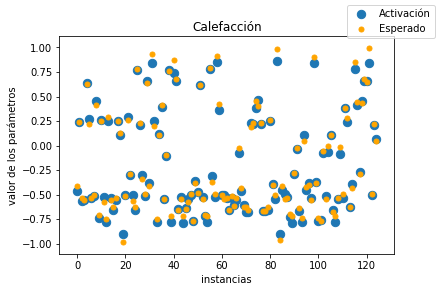

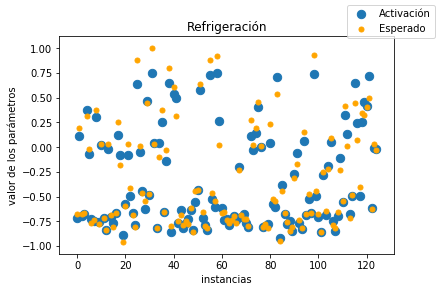

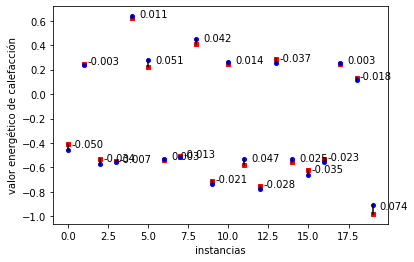

0.550948717035309


In [30]:
 exp(
    [8, 8, 2],
    2000,
    0.02,
    (0, 375),
    (375, 500),
    5
)